<a href="https://colab.research.google.com/github/zeniaharoon/KineXAI/blob/main/wearable_tech_data_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
datapath = "/content/drive/MyDrive/physical therapy data/test11.txt"

In [ ]:
column_names = ['time_index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
data = pd.read_csv(datapath, delimiter=';', names=column_names, skiprows=1)
data = data[50:5500]

In [ ]:
print(data.head())

    time_index     acc_x      acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
50          51 -1.297833   9.980694  2.433569  0.110211 -0.013775  0.016566   
51          52 -1.006657   9.374055  2.466743  0.289364  0.034321  0.061574   
52          53 -1.103568   9.658414  2.465872  0.292723  0.017630  0.075956   
53          54 -1.178009   9.980283  2.390759  0.558244  0.036880  0.135146   
54          55 -1.193062  10.131027  2.032241  0.600320 -0.000532  0.225239   

       mag_x     mag_y     mag_z  
50 -0.208379 -0.914065 -0.145339  
51 -0.210380 -0.912645 -0.139005  
52 -0.212662 -0.911951 -0.127469  
53 -0.218529 -0.912570 -0.109326  
54 -0.227297 -0.912026 -0.087744  


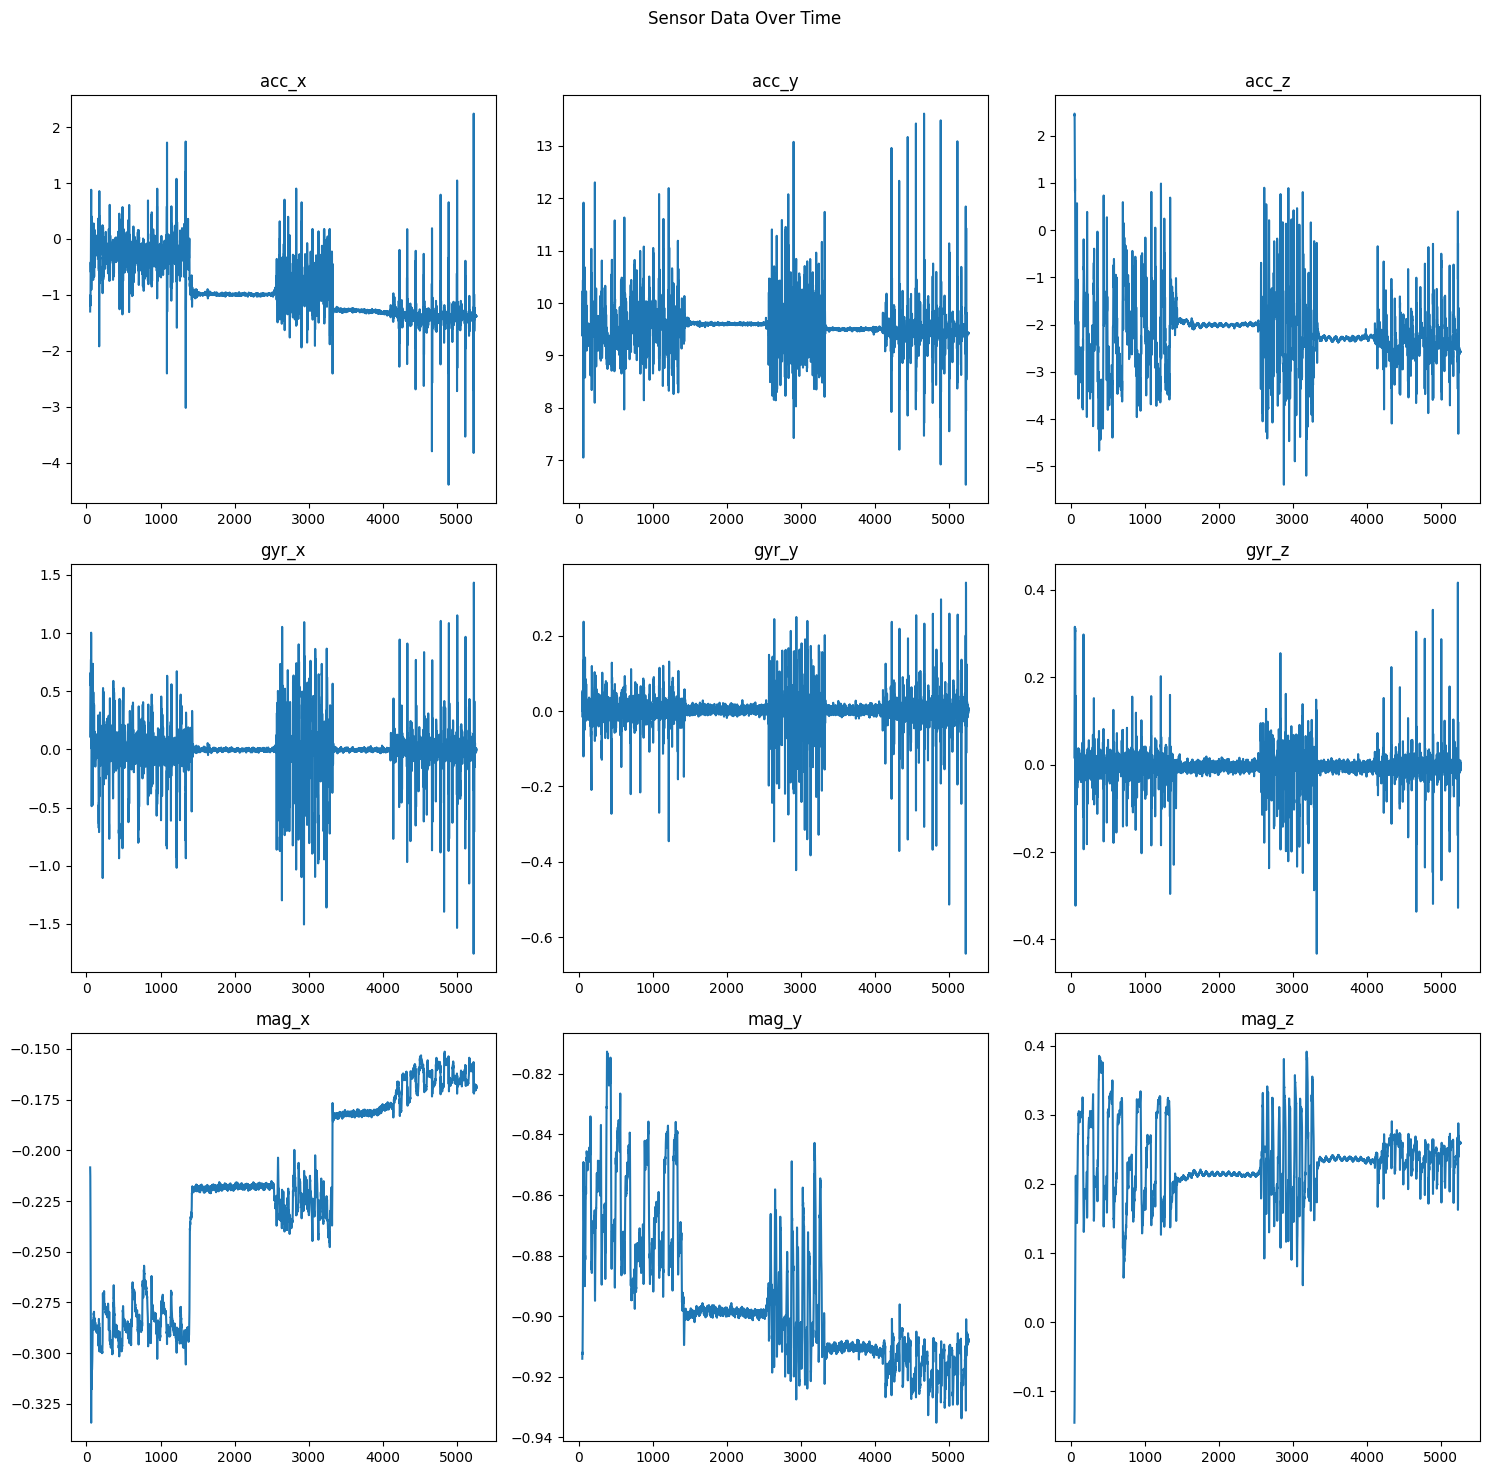

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Sensor Data Over Time')

axs[0, 0].plot(data['acc_x'])
axs[0, 0].set_title('acc_x')
axs[0, 1].plot(data['acc_y'])
axs[0, 1].set_title('acc_y')
axs[0, 2].plot(data['acc_z'])
axs[0, 2].set_title('acc_z')

axs[1, 0].plot(data['gyr_x'])
axs[1, 0].set_title('gyr_x')
axs[1, 1].plot(data['gyr_y'])
axs[1, 1].set_title('gyr_y')
axs[1, 2].plot(data['gyr_z'])
axs[1, 2].set_title('gyr_z')

axs[2, 0].plot(data['mag_x'])
axs[2, 0].set_title('mag_x')
axs[2, 1].plot(data['mag_y'])
axs[2, 1].set_title('mag_y')
axs[2, 2].plot(data['mag_z'])
axs[2, 2].set_title('mag_z')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
acc_x_dm= data["acc_x"] - data["acc_x"].mean()
acc_y_dm= data["acc_y"] - data["acc_y"].mean()
acc_z_dm= data["acc_z"] - data["acc_z"].mean()

gyr_x_dm= data["gyr_x"] - data["gyr_x"].mean()
gyr_y_dm= data["gyr_y"] - data["gyr_y"].mean()
gyr_z_dm= data["gyr_z"] - data["gyr_z"].mean()

mag_x_dm= data["mag_x"] - data["mag_x"].mean()
mag_y_dm= data["mag_y"] - data["mag_y"].mean()
mag_z_dm= data["mag_z"] - data["mag_z"].mean()

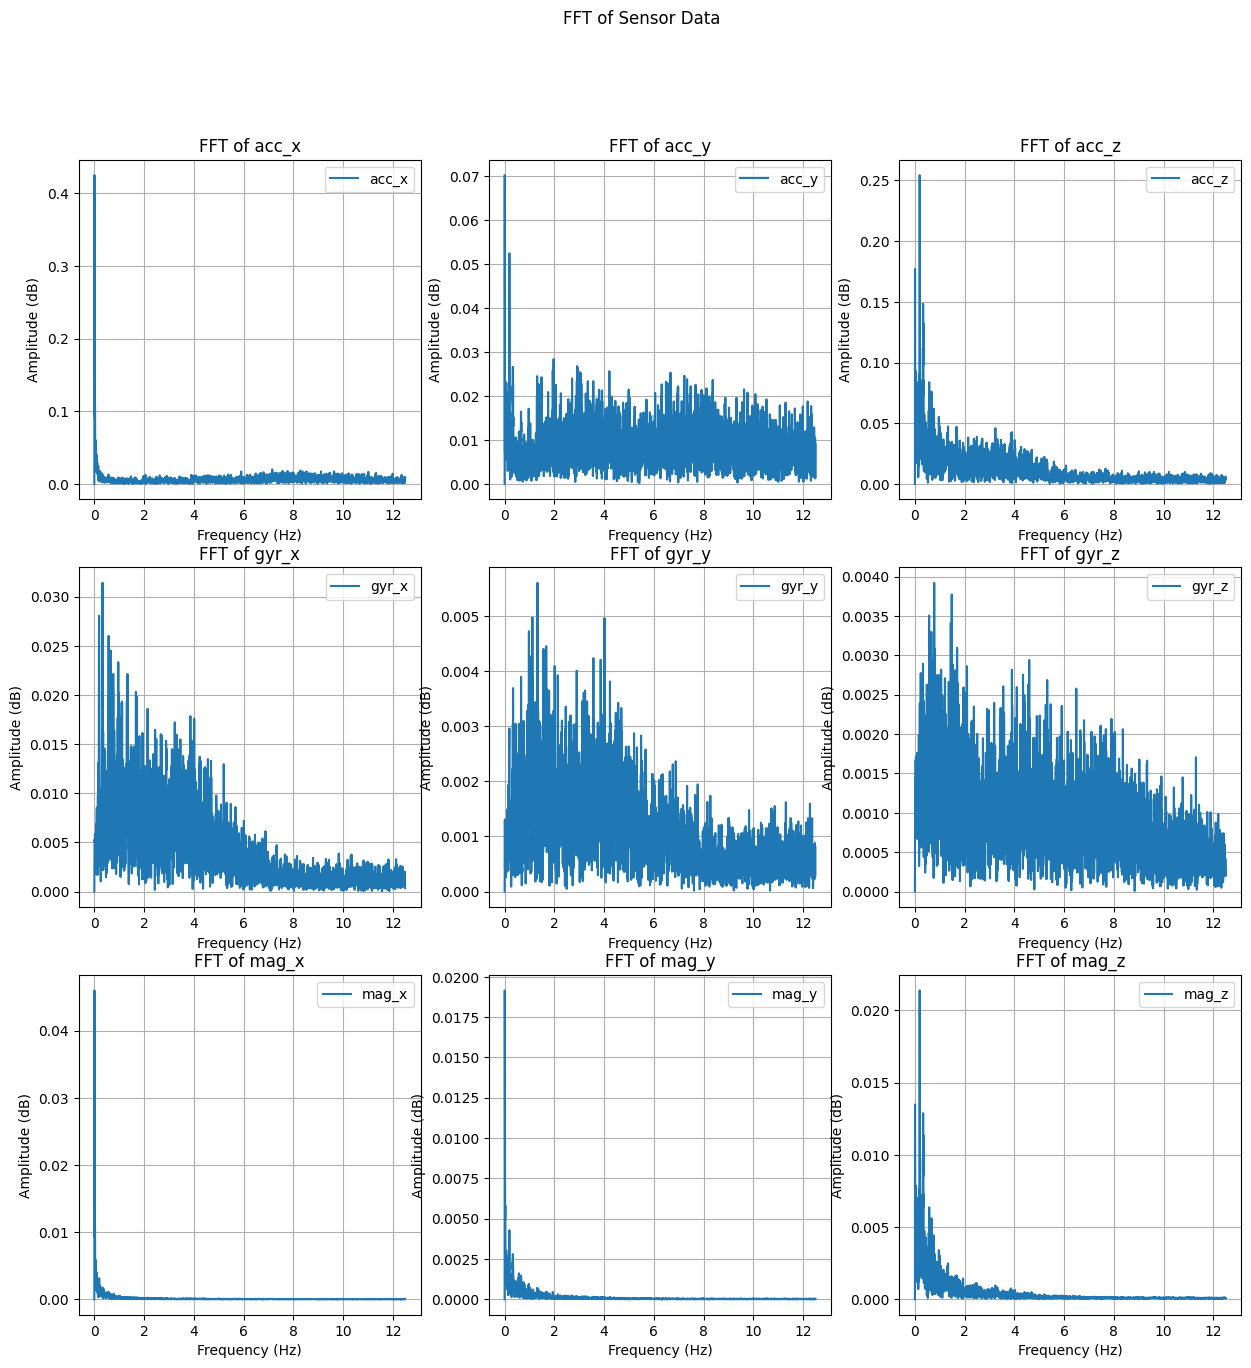

<Figure size 1500x1000 with 0 Axes>

In [ ]:
def plot_fft(ax, data, sampling_rate, sensor_name):
    N = len(data)
    T = 1.0 / sampling_rate
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(N, T)[:N//2]
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), label=sensor_name)
    ax.set_title(f'FFT of {sensor_name}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude (dB)')
    ax.legend()
    ax.grid()

sampling_rate = 25

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('FFT of Sensor Data')

plt.figure(figsize=(15, 10))
plot_fft(axs[0, 0], acc_x_dm, sampling_rate, 'acc_x')
plot_fft(axs[0, 1], acc_y_dm, sampling_rate, 'acc_y')
plot_fft(axs[0, 2], acc_z_dm, sampling_rate, 'acc_z')

plot_fft(axs[1, 0], gyr_x_dm, sampling_rate, 'gyr_x')
plot_fft(axs[1, 1], gyr_y_dm, sampling_rate, 'gyr_y')
plot_fft(axs[1, 2], gyr_z_dm, sampling_rate, 'gyr_z')

plot_fft(axs[2, 0], mag_x_dm, sampling_rate, 'mag_x')
plot_fft(axs[2, 1], mag_y_dm, sampling_rate, 'mag_y')
plot_fft(axs[2, 2], mag_z_dm, sampling_rate, 'mag_z')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

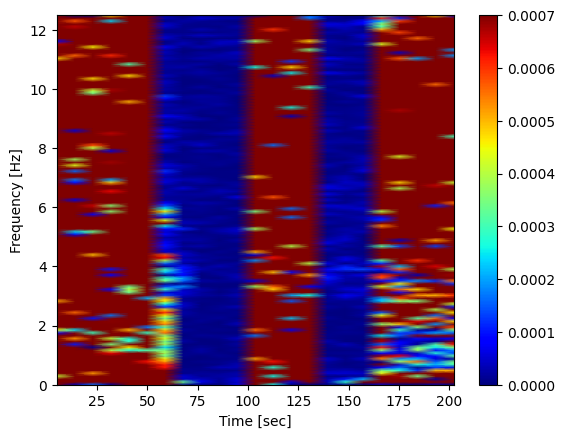

In [ ]:
f_acc_x, t_acc_x, Sxx_acc_x = signal.spectrogram(acc_x_dm, sampling_rate)
final_acc_x = pd.DataFrame(Sxx_acc_x).iloc[:,0:Sxx_acc_x.shape[1]].mean(axis = 1)
plt.pcolormesh(t_acc_x, f_acc_x, Sxx_acc_x, shading='gouraud', cmap = plt.cm.jet, vmin = 0, vmax = 0.0007)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

In [ ]:
final_acc_x

,0
0,0.000747
1,0.037287
2,0.009461
3,0.005134
4,0.002263
...,...
124,0.002318
125,0.002105
126,0.003100
127,0.002966


In [ ]:
Sxx_acc_x.shape

(129, 24)

In [ ]:
directory_path = f'/content/drive/MyDrive/physical therapy data/'
spectrograms = []
labels = []

ind = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, \
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
labeler = 1

for i in ind:
    file_path = os.path.join(directory_path, f'test{i}.txt')
    column_names = ['time_index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']
    data = pd.read_csv(file_path, delimiter=';', names=column_names, skiprows=1)
    data = data[50:5000]
    acc_x_dm = data["acc_x"] - data["acc_x"].mean()
    f_acc_x, t_acc_x, Sxx_acc_x = signal.spectrogram(acc_x_dm, sampling_rate)
    spectrograms.append(Sxx_acc_x)
    # print(i)
    # print(Sxx_acc_x.shape)
    if i == 9 or i == 17 or i == 25 or i == 33:
        labeler = 1
    labels.append(labeler)
    labeler += 1

spectrograms = np.array(spectrograms)
labels = np.array(labels)
print(len(spectrograms))

40


In [ ]:
print(spectrograms.shape)

(40, 129, 21)


In [ ]:
print(labels)

[1 2 3 4 5 6 7 8 1 2 3 4 5 6 7 8 1 2 3 4 5 6 7 8 1 2 3 4 5 6 7 8 1 2 3 4 5
 6 7 8]


In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras import datasets
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
from sklearn.utils import shuffle

In [ ]:
labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, \
                   0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Valid, y_Train, y_Valid = train_test_split(spectrograms, labels, test_size=0.4)

In [ ]:
print(type(X_Train))
print(type(y_Train))
print(type(X_Valid))
print(type(y_Valid))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(len(X_Train))
print(len(y_Train))
print(len(X_Valid))
print(len(y_Valid))

24
24
16
16


In [ ]:
print(X_Train.shape)
print(y_Train.shape)
print(X_Valid.shape)
print(y_Valid.shape)

(24, 129, 21)
(24,)
(16, 129, 21)
(16,)


In [ ]:
# Reshape X_Train to include a channels dimension
X_Train = X_Train.reshape(X_Train.shape[0], X_Train.shape[1], X_Train.shape[2], 1)
X_Valid = X_Valid.reshape(X_Valid.shape[0], X_Valid.shape[1], X_Valid.shape[2], 1)
print(X_Train.shape)
print(y_Train.shape)
print(X_Valid.shape)
print(y_Valid.shape)

(24, 129, 21, 1)
(24,)
(16, 129, 21, 1)
(16,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, # No. of filters
                         (3,3), # Kernel size
                         activation='relu',
                         input_shape= X_Train.shape[1:]
                         ),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(8, activation='softmax')
])
adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.99, beta_2 = 0.999, amsgrad = False)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 127, 19, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 63, 9, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 63, 9, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 7, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 3, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 3, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2880)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         368,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 382,728 (1.46 MB)

 Trainable params: 382,728 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_Train, y_Train, epochs = 250, batch_size = 16, validation_data = (X_Valid, y_Valid), shuffle = True, verbose = 1)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 284ms/step - accuracy: 0.1250 - loss: 5.3318 - val_accuracy: 0.0625 - val_loss: 5.0263
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2222 - loss: 4.9864 - val_accuracy: 0.0000e+00 - val_loss: 4.7125
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2222 - loss: 4.6692 - val_accuracy: 0.0000e+00 - val_loss: 4.4273
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.1806 - loss: 4.3808 - val_accuracy: 0.0000e+00 - val_loss: 4.1702
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2014 - loss: 4.1186 - val_accuracy: 0.0000e+00 - val_loss: 3.9409
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2014 - loss: 3.8824 - val_accuracy: 0.0000e+00 - val_loss: 3.7385
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.2014 - loss: 3.6643 - val_accuracy: 0.0000e+00 - val_loss: 3.5632
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2014 - loss: 3.4743 - val_ac

In [ ]:
# make predictions
y_Pred = model.predict(spectrograms)
y_Pred_classes = np.argmax(y_Pred, axis=1)
y_Pred_classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


array([1, 1, 7, 1, 4, 1, 1, 1, 4, 1, 3, 3, 4, 5, 3, 7, 1, 5, 4, 3, 4, 5,
       7, 5, 1, 1, 4, 3, 4, 5, 1, 7, 5, 1, 4, 3, 4, 5, 1, 1])

In [ ]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5,
       6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, y_Pred_classes)
print(accuracy)

0.475


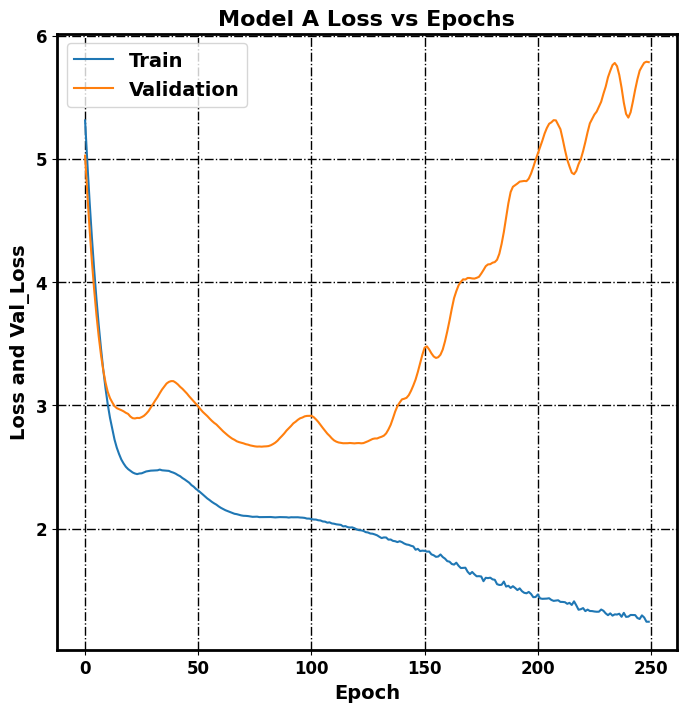

In [ ]:
# summarize history for loss
plt.figure(facecolor='white')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model A Loss vs Epochs', fontsize=16, fontweight="bold")
plt.ylabel('Loss and Val_Loss', fontsize=14, fontweight="bold")
plt.xlabel('Epoch',fontsize= 14, fontweight="bold")
plt.xticks(fontsize=12,fontweight="bold")
plt.yticks(fontsize=12,fontweight="bold")
# plt.xlim([-50, 2050])
# plt.ylim([0, 0.2])

plt.grid(color='black', linestyle='-.', linewidth=1)
plt.rcParams.update({'axes.linewidth': 2})
legend = plt.legend(['Train', 'Validation'], loc='upper left', prop={'size': 14, 'weight':'bold'})
fig = plt.gcf()
fig.set_size_inches(8, 8, forward=True)
# ax = fig.gca()
# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")
# ax.set_facecolor("white")
# frame = legend.get_frame()
# frame.set_facecolor('white')
# frame.set_edgecolor('black')
plt.show()

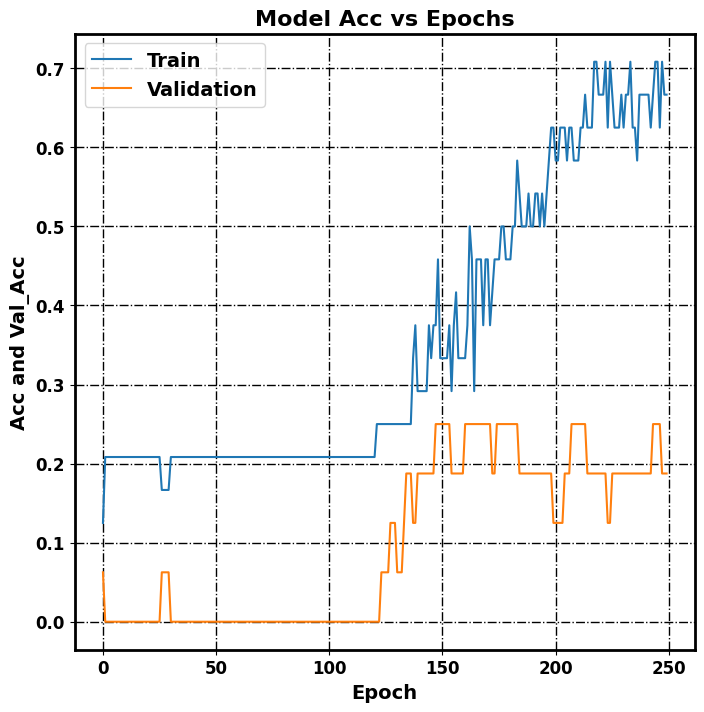

In [ ]:
# summarize history for loss
plt.figure(facecolor='white')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acc vs Epochs', fontsize=16, fontweight="bold")
plt.ylabel('Acc and Val_Acc', fontsize=14, fontweight="bold")
plt.xlabel('Epoch',fontsize= 14, fontweight="bold")
plt.xticks(fontsize=12,fontweight="bold")
plt.yticks(fontsize=12,fontweight="bold")
# plt.xlim([-50, 2050])
# plt.ylim([0, 0.2])

plt.grid(color='black', linestyle='-.', linewidth=1)
plt.rcParams.update({'axes.linewidth': 2})
legend = plt.legend(['Train', 'Validation'], loc='upper left', prop={'size': 14, 'weight':'bold'})
fig = plt.gcf()
fig.set_size_inches(8, 8, forward=True)
# ax = fig.gca()
# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")
# ax.set_facecolor("white")
# frame = legend.get_frame()
# frame.set_facecolor('white')
# frame.set_edgecolor('black')
plt.show()